# Script to preprocess the Word images into a trainable format.

-------------------------------------------------------------------------------------------------------------------
# Technology used: basic preprocessing tools

### Start with importing the usual cells for my tasks

In [1]:
# packages used for processing: 
import cPickle as pickle # for reading the data
import matplotlib.pyplot as plt # for visualization
import numpy as np
from scipy.ndimage import imread
from scipy.misc import imresize

# for operating system related stuff
import os
import sys # for memory usage of objects
from subprocess import check_output

# to plot the images inline
%matplotlib inline

In [2]:
# Input data files are available in the "../Data/" directory.

def exec_command(cmd):
    '''
        function to execute a shell command and see it's 
        output in the python console
        @params
        cmd = the command to be executed along with the arguments
              ex: ['ls', '../input']
    '''
    print(check_output(cmd).decode("utf8"))

In [3]:
# check the structure of the project directory
exec_command(['ls', '..'])

LICENSE
Models
network_architecture
processed_words_binary_data
README.md
readme.txt
readme.txt~
Scripts
svc2004
task_log
thresh_wordnet_english_test.py
thresh_wordnet_english_test.py~
words_binary



In [4]:
''' Set the constants for the script '''

# various paths of the files
data_path = "../words_binary" # the data path
base_model_path = "../Models"
processed_data_path = "../processed_words_binary_data"

# constants for the preprocessing script
fixed_resize = (96, 192, 3)
batch_size = 5000 # 10000 images in each batch

In [5]:
# get a list of all the files from the data directory
data_files = os.listdir(data_path)
data_files[: 3] # view a few files from the directory

['word_3017.jpg', 'word_3353.jpg', 'word_33819.jpg']

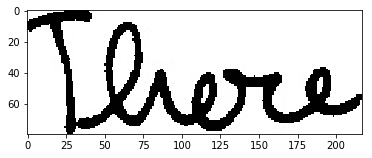

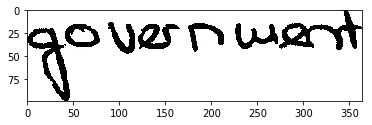

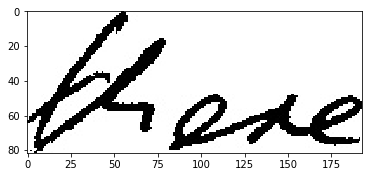

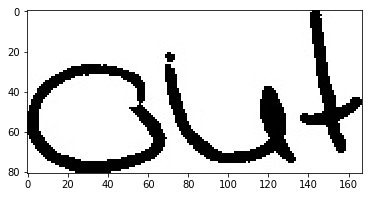

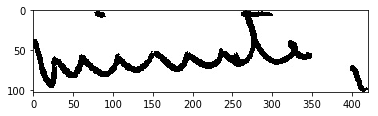

In [6]:
# read and display some random images from this list

for _ in range(5):
    random_index = np.random.randint(len(data_files))

    # read the data from the file
    data_file = os.path.join(data_path, data_files[random_index])
    random_image = imread(data_file)

    # plot the random image
    plt.figure() # create a new figure every time this loop iterates
    plt.imshow(random_image); # suppress the unnecessary output

It can be easily observed that the image sizes are not consistent. But, while feeding the images into an autoencoder, we must have a fixed size. So, resize all the images in the dataset to a fixed size.

-------------------------------------------------------------------------------------------------------------------
### The size chosen for this task is: 96 x 192

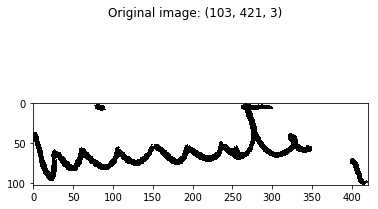

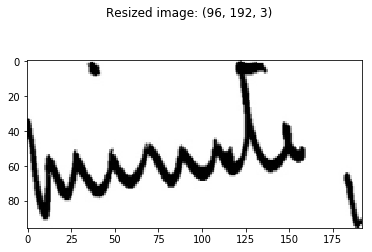

In [7]:
# testing the scipy.misc.imresize method for our task:
plt.figure().suptitle("Original image: " + str(random_image.shape))
plt.imshow(random_image);

# resize the image:
resized_random_image = imresize(random_image, fixed_resize)

plt.figure().suptitle("Resized image: " + str(resized_random_image.shape))
plt.imshow(resized_random_image);

It is good see that there is not a huge loss of information in resizing. The image has become a bit blurred since the resolution has decreased. However, the spatial information and the most important strokes patterns are preserved.

# Putting it all together: Create a function to extract all the images -> resize them -> and then pickle them into a numpy array

In [8]:
len(data_files) # total images in the dataset

48929

In [12]:
# create a function to process the data and return a numpy array for the same:
def process_data(inpath, outPath, log_factor = 100):
    '''
        Function to process the raw images and convert them into batches of 10000 as pickle files.
        @param
        inpath => path to the input files directory.
        outpath => path to write the output files to.
        log_factor => print a feedback comment after these many iterations. Defaults to 100
    '''
    
    # get a list of all the files in the dataset.
    files = os.listdir(inpath)
    
    total_images = len(files) # total images in dataset
    
    print "Processing started... " + "\nTotal images: " + str(total_images)
    
    # main loop for processing the data
    for batch in range((total_images / batch_size) + 1):
        print "Processing current batch: " + str(batch + 1) + "..."
        
        # take a slice of the images to be put into this batch:
        start = batch * batch_size; end = start + batch_size
        batch_files = files[start: end]
        
        # create an empty numpy array for the data
        data = np.ndarray((len(batch_files), fixed_resize[0], fixed_resize[1], fixed_resize[2]), dtype=np.float32)
        print data.shape
        
        # read every image in batch_files, resize it and put the data into data
        for file_index in range(len(batch_files)):
            imgfile = os.path.join(inpath, batch_files[file_index])
            data[file_index] = imresize(imread(imgfile), fixed_resize)
            
            # log a comment for every 100 images completion:
            if((file_index + 1) % log_factor == 0):
                print "Completed " + str(file_index + 1) + " images..."
        
        # finally pickle the data in the outpath
        save_path = os.path.join(outPath, "batch_" + str(batch + 1))
        with open(save_path, "w") as dumping:
            pickle.dump(data, dumping)
        
        print "Processed batch: " + str(batch + 1)
        
        # delete the data to free up memory
        del data
    
    # print a feedback message after the porcessing is complete
    print "Processing complete! Check " + outPath + " For the output..."

In [ ]:
# execute the processing function to get the output.
process_data(data_path, processed_data_path)

Processing started... 
Total images: 48929
Processing current batch: 1...
(5000, 96, 192, 3)
Completed 100 images...
Completed 200 images...
Completed 300 images...
Completed 400 images...
Completed 500 images...
Completed 600 images...
Completed 700 images...
Completed 800 images...
Completed 900 images...
Completed 1000 images...
Completed 1100 images...
Completed 1200 images...
Completed 1300 images...
Completed 1400 images...
Completed 1500 images...
Completed 1600 images...
Completed 1700 images...
Completed 1800 images...
Completed 1900 images...
Completed 2000 images...
Completed 2100 images...
Completed 2200 images...
Completed 2300 images...
Completed 2400 images...
Completed 2500 images...
Completed 2600 images...
Completed 2700 images...
Completed 2800 images...
Completed 2900 images...
Completed 3000 images...
Completed 3100 images...
Completed 3200 images...
Completed 3300 images...
Completed 3400 images...
Completed 3500 images...
Completed 3600 images...
Completed 3700 i